In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [72]:
df = pd.read_excel("D:\Online_Retail.xlsx")

In [73]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [74]:
df1 = df.copy()

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [76]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [77]:
df1 = df1[df1['Quantity']>0]
df1 = df1[df1['UnitPrice']>= 0.01]

In [78]:
df1['Amount'] = df1['Quantity']*df1['UnitPrice']

In [79]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
Amount              0
dtype: int64

In [80]:
df1 = df1.dropna()

In [81]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397880 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      397880 non-null object
StockCode      397880 non-null object
Description    397880 non-null object
Quantity       397880 non-null int64
InvoiceDate    397880 non-null datetime64[ns]
UnitPrice      397880 non-null float64
CustomerID     397880 non-null float64
Country        397880 non-null object
Amount         397880 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [83]:
monetary = df1.groupby(['CustomerID'])['Amount'].agg('sum')

In [84]:
df1['InvoiceNo'].nunique()

18532

In [191]:
freq = df.groupby(['CustomerID'])['InvoiceDate'].nunique()

In [86]:
freq

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceDate, Length: 4372, dtype: int64

In [87]:
freq1 = df.groupby(['CustomerID'])['InvoiceDate'].agg('count')  

In [88]:
freq1

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceDate, Length: 4372, dtype: int64

In [89]:
max_dt = max(df1['InvoiceDate'])   #Finding the most recent date in the dataset and then we subtract all the invoice dates from that to find how long back each customer visited the website for purchase. 

In [90]:
max_dt

Timestamp('2011-12-09 12:50:00')

In [91]:
df1['rec'] = max_dt - df1['InvoiceDate']
df1['rec'] = df1['rec'].apply(lambda x:x.days)

In [93]:
recency = df1.groupby('CustomerID')['rec'].agg('min')

In [132]:
RFM = pd.DataFrame(monetary).merge(pd.DataFrame(freq),on = 'CustomerID')

In [133]:
RFM = RFM.merge(pd.DataFrame(recency),on = 'CustomerID')

In [100]:
RFM.head()

,Amount,InvoiceDate,rec
CustomerID,,,
12346.0,77183.60,2,326
12347.0,4310.00,7,2
12348.0,1797.24,4,75
12349.0,1757.55,1,19
12350.0,334.40,1,310


In [131]:
recency = recency + 1

In [101]:
RFM['rec'].value_counts()

4      111
1       93
3       89
2       86
8       76
      ... 
259      1
322      1
258      1
370      1
314      1
Name: rec, Length: 349, dtype: int64

In [161]:
RFM = RFM.rename(columns = {'rec':'recency','InvoiceData':'Freq'})

In [162]:
RFM.head()

,Amount,InvoiceDate,recency
CustomerID,,,
12346.0,77183.60,2,327
12347.0,4310.00,7,3
12348.0,1797.24,4,76
12349.0,1757.55,1,20
12350.0,334.40,1,311


In [207]:
q1 = RFM.quantile(0.25)
q3 = RFM.quantile(0.75)
iqr = q3- q1
RFM1 = RFM[~(RFM > (q3 + 1.5 *iqr)).any(axis = 1)]

In [208]:
RFM.shape

(4338, 3)

In [209]:
RFM1.shape  # Dataset Without outliers

(3647, 3)

In [210]:
RFM1

,Amount,InvoiceDate,recency
CustomerID,,,
12348.0,1797.24,4,76
12349.0,1757.55,1,20
12350.0,334.40,1,311
12352.0,2506.04,11,37
12353.0,89.00,1,205
...,...,...,...
18278.0,173.90,1,75
18280.0,180.60,1,279
18281.0,80.82,1,182


In [211]:
from sklearn.preprocessing import StandardScaler


In [212]:
sc = StandardScaler()

In [213]:
RFMs = sc.fit_transform(RFM1)

In [214]:
kmeans = KMeans()

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k,random_state = 3)
    kmeans.fit(RFMs)
    ssd1 = kmeans.inertia_
    ssd.append(ssd1)

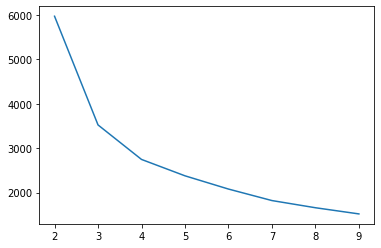

In [141]:
plt.plot(range(2,10),ssd)
plt.show()

In [114]:
import plusmodules as pm

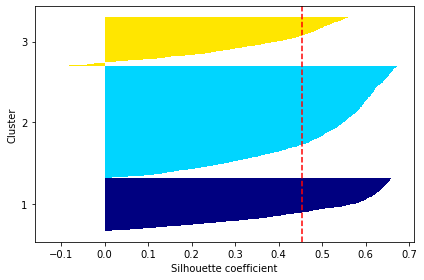

In [115]:
pm.svisualizer(RFMs,3)

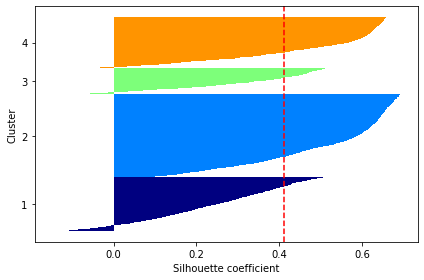

In [116]:
pm.svisualizer(RFMs,4)

In [215]:
kmeans = KMeans(n_clusters = 3,random_state = 3)
kmeans.fit(RFMs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [218]:
kmeans.labels_

array([1, 2, 0, ..., 0, 2, 1])

In [219]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

In [220]:
type(df_labels)

pandas.core.frame.DataFrame

In [221]:
df_labels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 1 columns):
labels    3647 non-null int32
dtypes: int32(1)
memory usage: 14.4 KB


In [187]:
RFM1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3647 entries, 12348.0 to 18287.0
Data columns (total 3 columns):
Amount         3647 non-null float64
InvoiceDate    3647 non-null int64
recency        3647 non-null int64
dtypes: float64(1), int64(2)
memory usage: 274.0 KB
